In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
import json, re, os
from tqdm.auto import tqdm


In [2]:
fs = sorted(Path('../outputs').glob('*.md'))
len(fs)

10236

In [3]:
# Python script to extract links from Markdown using libraries
import markdown
from bs4 import BeautifulSoup

# now extract links from these
def extract_links_library(markdown_text):
    # Convert Markdown to HTML
    html = markdown.markdown(markdown_text)
    
    # Parse HTML with BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    
    # Find all <a> tags and extract href attributes
    links = [a['href'] for a in soup.find_all('a', href=True)]
    
    return links

data = []
for f in fs:
    s = f.open().read()
    data += extract_links_library(s)

In [18]:
df_links = pd.Series(data).value_counts()
# df_links

In [19]:
blocklist = ['reddit', 'redact', 'pastebin', 'wikipedia', 'docs.google', 'discord','tvtropes.org']
df_links = df_links[~df_links.index.str.contains('|'.join(blocklist), regex=True)]
df_links = df_links[df_links.index.str.startswith('http')]
df_links = df_links[df_links > 1]
pd.Series(df_links.index, index=df_links.values)

49                 https://www.fanfiction.net/s/5193644
49    https://www.fictionpress.com/s/2961893/1/Mothe...
42          https://www.youtube.com/watch?v=kbyTOAlhRHk
42    https://forums.sufficientvelocity.com/threads/...
40    https://www.fanfiction.net/s/10360716/1/The-Me...
                            ...                        
2     https://www.fanfiction.net/s/10360716/6/The-Me...
2     https://www.goodreads.com/series/291662-lightb...
2     https://forums.spacebattles.com/threads/a-pale...
2     https://forums.spacebattles.com/threads/an-und...
2     http://www.lspace.org/books/reading-order-guid...
Length: 2497, dtype: object

<Axes: ylabel='Frequency'>

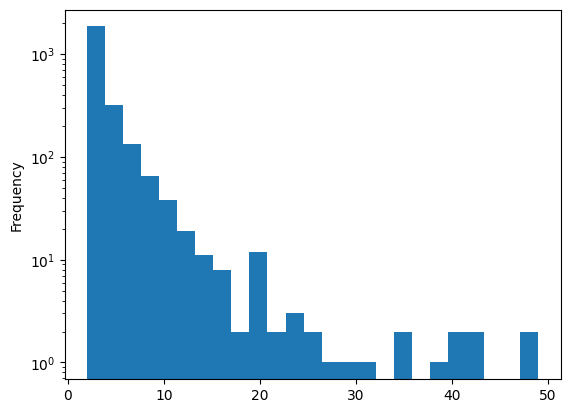

In [20]:
df_links.plot.hist(bins=25, logy=True)

In [21]:
df_links.index.tolist()

['https://www.fanfiction.net/s/5193644',
 'https://www.fictionpress.com/s/2961893/1/Mother-of-Learning',
 'https://www.youtube.com/watch?v=kbyTOAlhRHk',
 'https://forums.sufficientvelocity.com/threads/marked-for-death-a-rational-naruto-quest.24481/',
 'https://www.fanfiction.net/s/10360716/1/The-Metropolitan-Man',
 'https://archiveofourown.org/works/11478249/chapters/25740126',
 'https://pyrebound.wordpress.com/2019/01/17/one-a-child-of-the-hearth/',
 'https://www.fanfiction.net/s/5193644/1/Time-Braid',
 'https://www.fanfiction.net/s/9311012/1/Lighting-Up-the-Dark',
 'https://twigserial.wordpress.com/',
 'https://parahumans.wordpress.com/',
 'https://www.fanfiction.net/s/8096183/1/Harry-Potter-and-the-Natural-20',
 'http://unsongbook.com/',
 'https://www.royalroad.com/fiction/26727/arkendrithyst',
 'https://wertifloke.wordpress.com/2015/01/25/chapter-1/',
 'http://topwebfiction.com/vote.php?for=a-practical-guide-to-evil',
 'https://www.royalroad.com/fiction/21410/super-minion',
 'https